In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df_train=pd.read_csv('Train.csv')
df_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [ ]:
#the given dataset is of multiple variable linear regression
#beacause the target variable depends on the multiple factors
#the eqn of the plane will be, y=m1x1+m2x2+m3x3+....+mnxn+c

In [13]:
#a list containing ones of size x.shape[0] is added to the to the affecting factors
#we know that,y=theta(transpose)*x where theta=[c m] x=[1 x] 
#for multiple variables,for the convinience of calculation of the eqn y=m1x1+...+mnxn+c
#we can determine the value of y using matrix multiplication(dot product) of theta transpose and x
#y=theta(transpose)*x where theta=[c m1 m2 ... mn] x=[1 x1 x2 ... xn]
arr=np.ones(df_train.shape[0],dtype='int')
arr

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
#defining the target variables and depending factor variables
x = np.c_[arr,df_train['feature_1'],df_train['feature_2'],df_train['feature_3'],df_train['feature_4'],df_train['feature_5']]
y = df_train['target']
#converting the target variable into numpy array for calculations
y = y.values.reshape(-1,)

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [26]:
#the predicted value can be determined by the dot product of theta and depending factors
def hypothesis(x,theta):
    return np.dot(x,theta) 

In [35]:
#x.shape[0] gives the number of points(records) in the dataset
#mse method is used as it creates a parabola
# a convex function is created
# a global minimum can be easily acquired using gradient descent when a line passes through the parabola
#mse formula= (1/x.shape[0])*(predicted - exact value)**2
def error(x,y,theta):
    error=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        error+=(hx-y[i])**2
    return error/x.shape[0]

In [36]:
# tge grad list consists of values m1,m2, .. ,mn,c
# the size of the grad list will be equal to size of affecting factors + 1(plus 1 is for 'c' i.e., intercept)
#plan eqn is nothing but y=m1x1+m2x2+..mnxn+c
def gradient(x,y,theta):
    grad=np.zeros((theta.shape))
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],theta)
        grad += (hx - y[i])*x[i]#the grad formula is obtained by partially differentiating the plane eqn
        #we do not need to partially differentiate plane eqn with c as we will be doing the dot product of c with ones list
    return grad/x.shape[0]

In [37]:
#applying the gradient descent
#using the update rule of theta
def gradientdescent(x,y,learning_rate = 0.01):
    #alpha=0.001 is mostly preferred value as high alpha may miss the optimal minimum in the parabola
    #low alpha makes the model's learning rate slow
    #assigning random theta values that is random m1,m2,...,mn and c values
    theta = np.zeros((x.shape[1],))#the x.shape[1] gives the number of affecting factors(features)
    err_list = []
    theta_list = []
    #more the iterations, more accurate the gradient descent works but it is time-consuming
    #iterations directly proportional to accuracy and time-consumption
    itr=1000
    for i in range(itr):
        grad = gradient(x,y,theta)
        err = error(x,y,theta)
        err_list.append(err)
        theta_list.append(theta)
        #here we subtract value from theta because we have to meet the local minimum that means move down to the parabola
        #update rule of theta[0]=theta[0]-alpha*differentiated part
        theta -= (learning_rate*grad)
    return theta,err_list,theta_list

In [38]:
#final_theta gives the m1,m2,...,mn and c values for the expected line
final_theta,error_list,theta_list=gradientdescent(x,y)

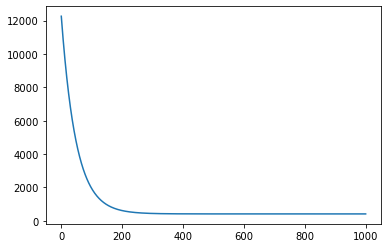

In [39]:
plt.plot(error_list)
plt.show()

In [40]:
print(final_theta)

[ 4.98825521 29.67987527 92.65908015  8.27756078 44.76510038  2.51769725]


In [41]:
df_test=pd.read_csv('Test.csv')
df_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [45]:
df_test['target']=final_theta[0]+df_test['feature_1']*final_theta[1]+df_test['feature_2']*final_theta[2]+df_test['feature_3']*final_theta[3]+df_test['feature_4']*final_theta[4]+df_test['feature_5']*final_theta[5]

In [46]:
df_test['target']

0      114.580520
1      118.004360
2      -21.738305
3      -43.934808
4      -95.917327
          ...    
395    -81.984927
396   -186.031350
397    125.287904
398     65.365147
399     57.054912
Name: target, Length: 400, dtype: float64